Proyecto práctico: árboles de decisión
- Data comes frome: Car Evaluation Data Set

- En este proyecto, exploraremos el conjunto de datos "Car Evaluation Data Set" y utilizaremos árboles de decisión para construir un modelo de clasificación capaz de predecir la calidad de compra de un automóvil.

Conociendo nuestro dataset
El conjunto de datos "Car Evaluation Data Set" es un conjunto de datos público que consta de 1728 instancias etiquetadas con la clase de calidad de compra del automóvil. Cada instancia tiene 6 atributos discretos: precio, mantenimiento, número de puertas, capacidad de personas, tamaño del maletero y seguridad.

Los atributos son definidos de la siguiente manera:

- price (Precio): representa el costo del automóvil. Los valores posibles son 'vhigh' (muy caro), 'high' (caro), 'med' (medio) y 'low' (económico).

- maint (Mantenimiento): representa el costo de mantenimiento del automóvil. Los valores posibles son 'vhigh' (muy caro), 'high' (caro), 'med' (medio) y 'low' (económico).

- doors (Número de puertas): representa la cantidad de puertas que tiene el automóvil. Los valores posibles son '2', '3', '4' y '5more' (5 o más).

- persons (Capacidad de personas): representa la capacidad de personas que puede transportar el automóvil. Los valores posibles son '2', '4', 'more' (más de 4).

- lug_boot (Tamaño del maletero): representa el tamaño del maletero del automóvil. Los valores posibles son 'small' (pequeño), 'med' (medio) y 'big' (grande).

- safety (Seguridad): representa la calidad de seguridad del automóvil. Los valores posibles son 'low' (baja), 'med' (media) y 'high' (alta).

- Class (Evaluación de la calidad de los automóviles):. Esta variable objetivo tiene cuatro posibles valores de clasificación: "unacc" (inaceptable), "acc" (aceptable), "good" (bueno) y "vgood" (muy bueno)

In [17]:
import os

# Especifica el nuevo directorio de trabajo
nuevo_directorio = 'C:\\Users\\paulo\\OneDrive\\Escritorio\\Diplomado DS\\Clase 32 Arboles de decision y random forest V_LEIVA'

# Cambia el directorio de trabajo
os.chdir(nuevo_directorio)

# Imprime el directorio de trabajo actual para confirmar el cambio
print("El directorio de trabajo actual es:", os.getcwd())

El directorio de trabajo actual es: C:\Users\paulo\OneDrive\Escritorio\Diplomado DS\Clase 32 Arboles de decision y random forest V_LEIVA


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

In [19]:
df_car = pd.read_csv('car_evaluation.csv', header=None)

columns_names = ['price','maint','doors','persons','lug_boot','safety','Class']

df_car.columns = columns_names

In [20]:
# Visualizacion del DataFrame
display(df_car.head())

# Visualizacion del shape del DF
print(df_car.shape)

# Tipos de datos
print(df_car.info())

# Vereificamos valores missings
print(df_car.isnull().sum())

,price,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


(1728, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None
price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64


- Hay 7 variables en el conjunto de datos, donde todas están clasificadas como datos categóricos.
- La variable Class es el objetivo del análisis.

Distribución de frecuencia y proprocion de las variables


In [21]:
# Funcion conteo y proporcion de datos
def dist(df,target):
    count= df[target].value_counts(normalize=False)
    prop = df[target].value_counts(normalize=True)

    dist = pd.DataFrame({'Freq[N]':count,'Prop[%]':prop.round(3)})
    return dist
# Ver el conteo y la proporción de Class 
for i in columns_names:
    print(' '*7,i.upper())
    print(dist(df_car,i))
    print("*"*23)

        PRICE
       Freq[N]  Prop[%]
price                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
***********************
        MAINT
       Freq[N]  Prop[%]
maint                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
***********************
        DOORS
       Freq[N]  Prop[%]
doors                  
2          432     0.25
3          432     0.25
4          432     0.25
5more      432     0.25
***********************
        PERSONS
         Freq[N]  Prop[%]
persons                  
2            576    0.333
4            576    0.333
more         576    0.333
***********************
        LUG_BOOT
          Freq[N]  Prop[%]
lug_boot                  
small         576    0.333
med           576    0.333
big           576    0.333
***********************
        SAFETY
        Freq[N]  Prop[%]
safety                  
low         576    0.333
med         576   

Análisis exploratorio de datos


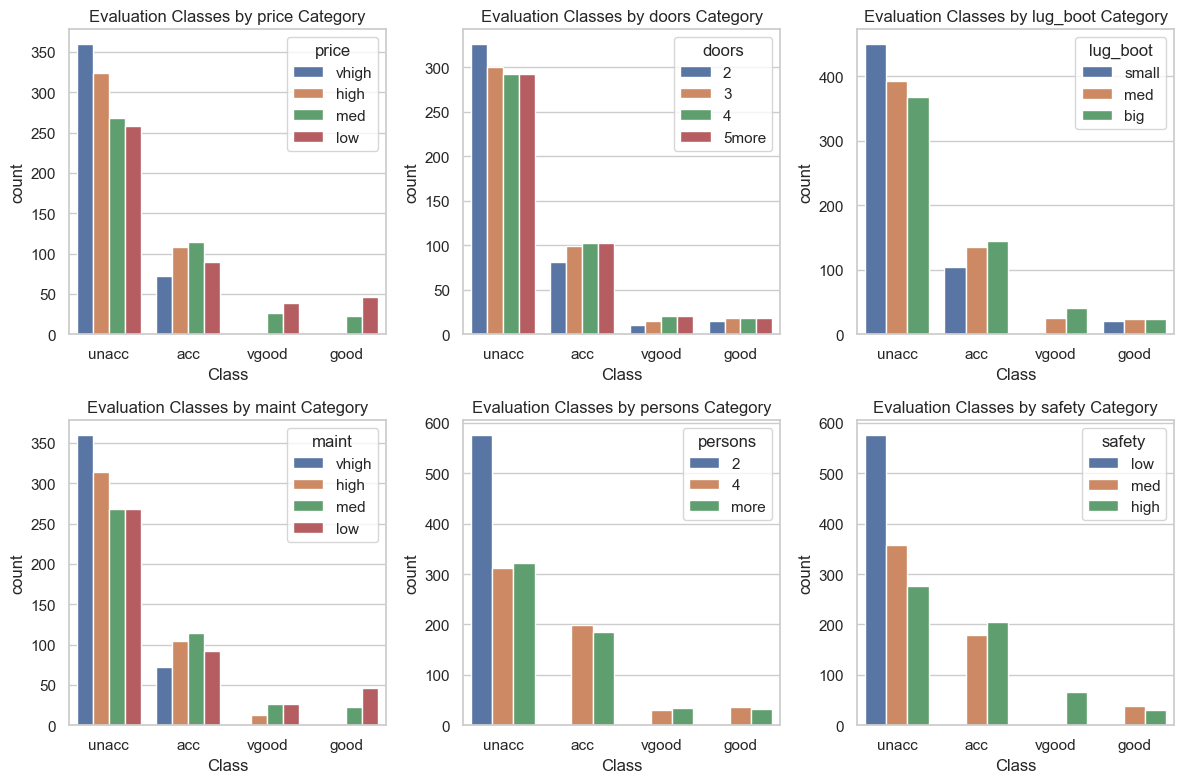

In [22]:
# Graficamos la variable Class separada por los distintos atributos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, variable in enumerate(columns_names[:-1]):
    row = i % 2
    col = i // 2
    sns.countplot(data=df_car, x='Class',hue=variable, ax=axes[row][col])
    axes[row][col].set_title(f"Evaluation Classes by {variable} Category")

plt.tight_layout()
plt.show()

Insight
- Price: Los autos con precio bajo o medio tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos de precio alto.

- Doors: Los autos con 4 o más puertas tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos de 3 o 2 puertas.

- Lug_boot: Los autos con maletero grande o mediano tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con maletero pequeño.

- Maint: Los autos con costos de mantenimiento bajos o medios tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con costos de mantenimiento altos.

- Persons: Los autos con capacidad de 4 o más personas tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con capacidad de menos de 4 personas.

- Safety: Los autos con alto nivel de seguridad tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con bajo o medio nivel de seguridad.

Undersampling


In [23]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [24]:
# Separamos datos por X e Y
X_car = df_car.drop('Class',axis=1)
y_car = df_car.Class
# Se realiza el undersampling
X_car, y_car = undersample.fit_resample(X_car,y_car)

In [25]:
#Pasamos los datos a categoricos de la siguiente manera:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=columns_names[:-1])

X_car = encoder.fit_transform(X_car)

In [26]:
display(X_car.head())

print(X_car.dtypes)

,price,maint,doors,persons,lug_boot,safety
1132,1,1,1,1,1,1
1078,1,2,2,1,1,1
1483,2,2,3,1,1,1
1415,2,2,4,2,2,2
395,3,3,3,2,1,2


price       int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
dtype: object


Split Data - Training and Testing

In [27]:

from sklearn.model_selection import train_test_split

X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X_car,y_car,test_size=0.3, random_state=42)
print('X:',X_train_car.shape, X_test_car.shape)
print('y:',y_train_car.shape, y_test_car.shape)

X: (182, 6) (78, 6)
y: (182,) (78,)


Entrenamiento del modelo

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Instancia del modelo
tree_car = DecisionTreeClassifier(random_state=42)

Optimización de parámetros

In [31]:
from sklearn.model_selection import GridSearchCV

# parametros del decision tree
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}
# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(tree_car, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_car, y_train_car)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 4}
Mejor puntuación de validación cruzada:
0.8026315789473685


In [32]:
# Modelo decision tree con parametros optimizados
best_tree_car = grid_search.best_estimator_


In [33]:
# Predecimos Y
y_train_pred_tree_car = best_tree_car.predict(X_train_car)
y_test_pred_tree_car = best_tree_car.predict(X_test_car)

Evaluacion del modelo

In [34]:
from sklearn.metrics import accuracy_score, classification_report
# Calculo el accuract en train 
train_acc = accuracy_score(y_true=y_test_car,y_pred=y_test_pred_tree_car)
# Calculo el accuract en test 
test_acc  = accuracy_score(y_true=y_train_car,y_pred=y_train_pred_tree_car)
print("El accuracy en train es:",train_acc)
print("El accuracy en test es:",test_acc)

El accuracy en train es: 0.717948717948718
El accuracy en test es: 0.8131868131868132


La precisión en los conjuntos de datos de entrenamiento y prueba están muy cercanas, lo que sugiere que el modelo no está sufriendo de sobreajuste.

In [35]:
print(classification_report(y_test_car,y_test_pred_tree_car))

              precision    recall  f1-score   support

         acc       0.77      0.62      0.69        16
        good       0.65      0.48      0.55        23
       unacc       1.00      0.80      0.89        20
       vgood       0.59      1.00      0.75        19

    accuracy                           0.72        78
   macro avg       0.75      0.73      0.72        78
weighted avg       0.75      0.72      0.71        78



- Podemos observar que el f1-score de la clase 'good' es relativamente bajo, mientras que el f1-score de 'unacc' es alto. Esto sugiere que el modelo tiene dificultades para clasificar correctamente las clase 'good'. Por otro lado, el f1-score de 'acc' y 'vgood' es promedio.

- El f1-score promedio general es de 0.72, lo cual indica que el modelo tiene un buen rendimiento general en la clasificación de las distintas clases.

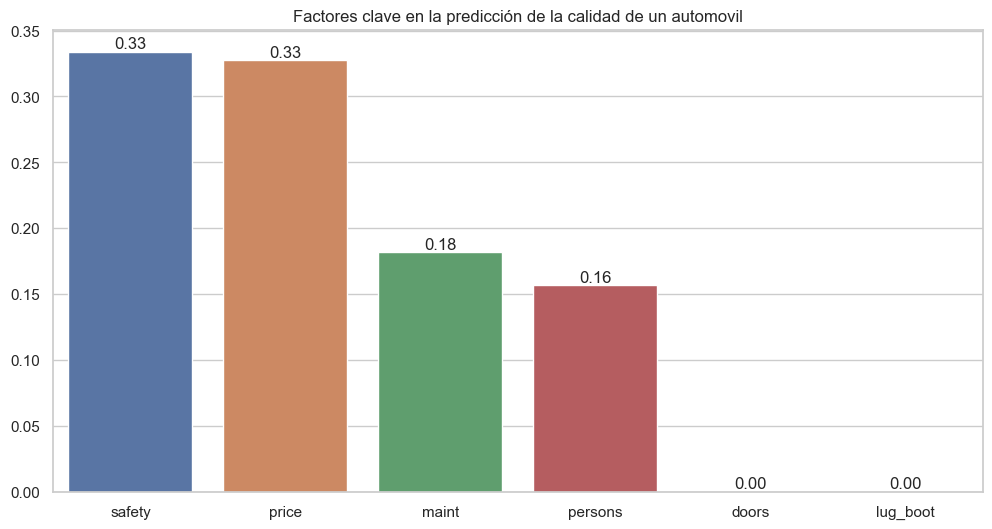

,0
safety,0.333983
price,0.327521
maint,0.182004
persons,0.156493
doors,0.000000
lug_boot,0.000000


In [36]:
feature_scores_car = pd.DataFrame(pd.Series(best_tree_car.feature_importances_, index=X_train_car.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_car)

for index, value in enumerate(feature_scores_car.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la calidad de un automovil")
plt.show()
pd.DataFrame(feature_scores_car.T)

El precio y el mantenimiento de un automóvil son factores cruciales en la determinación de su clasificación.

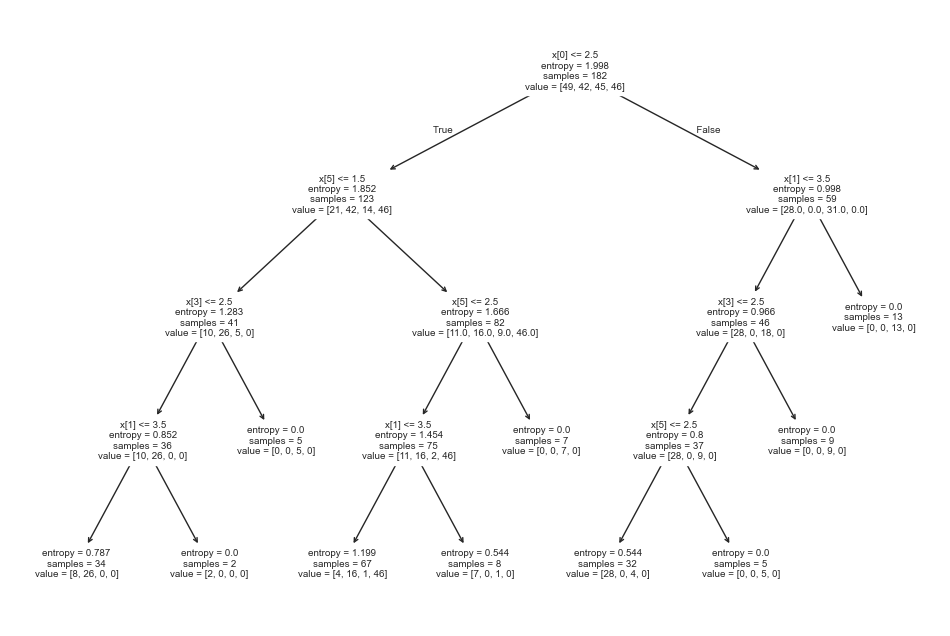

In [37]:
plt.figure(figsize = (12,8))
from sklearn import tree

tree.plot_tree(best_tree_car.fit(X_train_car, y_train_car));

Según tabla de datos:
- X[0]: price (Costo del automóvil)
- X[1]: maint (Costo de mantenimiento)
- X[2]: doors (Número de puertas)
- X[3]: persons (Capacidad de personas)
- X[4]: lug_boot (Tamaño del maletero)
- X[5]: safety (Seguridad)

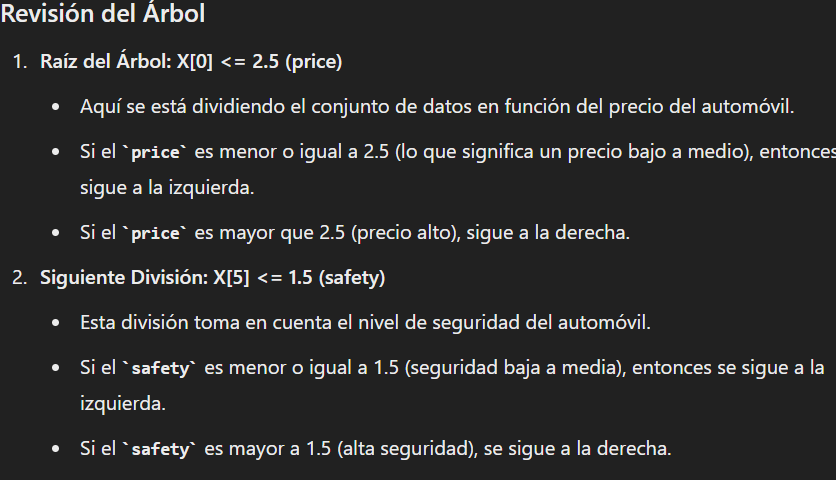

Conclusión nodo de hoja:

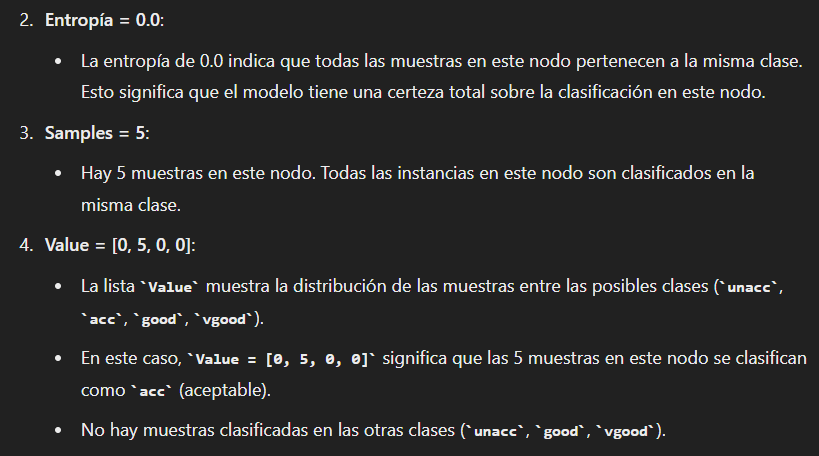

Este nodo hoja representa una combinación específica de características de los automóviles (precio bajo, seguridad baja o media, capacidad para 2 o 4 personas) que lleva a que todos los automóviles en este conjunto se clasifiquen como acc (aceptables).

<h1 style="color:#1a73e8;">Proyecto práctico: random forest</h1>

<p>En este proyecto, utilizaremos el modelo Random Forest y reutilizaremos el conjunto de datos "car evaluation".</p>


In [40]:
print(X_car)

print(y_car)

X_train_car,X_test_car,y_train_car,y_test_car = train_test_split(X_car,y_car, random_state=42)

      price  maint  doors  persons  lug_boot  safety
1132      1      1      1        1         1       1
1078      1      2      2        1         1       1
1483      2      2      3        1         1       1
1415      2      2      4        2         2       2
395       3      3      3        2         1       2
...     ...    ...    ...      ...       ...     ...
1700      2      3      3        1         1       2
1715      2      3      2        2         3       2
1718      2      3      2        2         1       2
1724      2      3      2        1         3       2
1727      2      3      2        1         1       2

[260 rows x 6 columns]
1132      acc
1078      acc
1483      acc
1415      acc
395       acc
        ...  
1700    vgood
1715    vgood
1718    vgood
1724    vgood
1727    vgood
Name: Class, Length: 260, dtype: object


Entrenamiento del modelo

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc_car = RandomForestClassifier(n_estimators=5,random_state=42)
rfc_car.fit(X_train_car,y_train_car)

y_pred_test_car = rfc_car.predict(X_test_car)
y_pred_train_car = rfc_car.predict(X_train_car)

In [43]:
#Evaluacion del modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_train_car,y_pred_train_car))
print(accuracy_score(y_test_car,y_pred_test_car))

0.9846153846153847
0.9076923076923077


In [44]:
print(classification_report(y_test_car,y_pred_test_car))

              precision    recall  f1-score   support

         acc       0.86      0.75      0.80        16
        good       0.85      1.00      0.92        17
       unacc       0.93      0.87      0.90        15
       vgood       1.00      1.00      1.00        17

    accuracy                           0.91        65
   macro avg       0.91      0.90      0.90        65
weighted avg       0.91      0.91      0.91        65



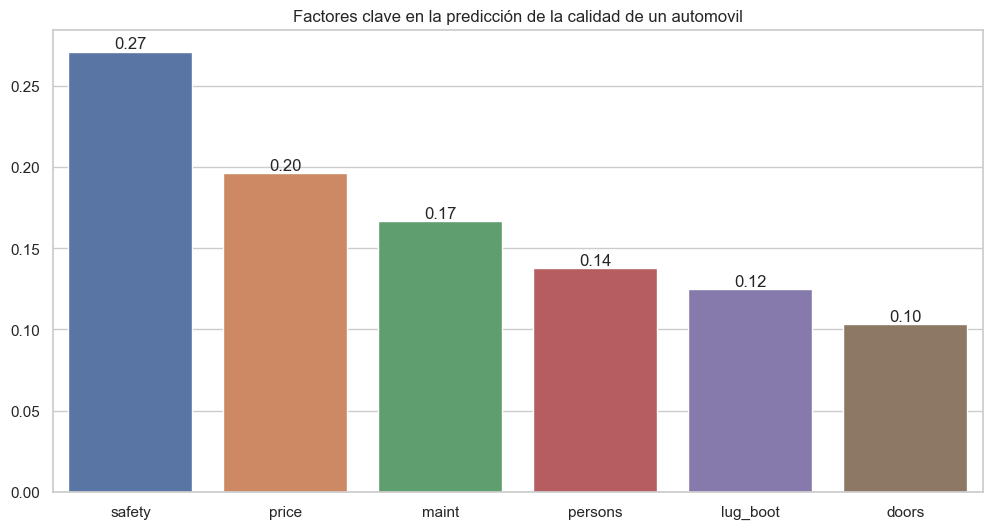

,0
safety,0.271247
price,0.196142
maint,0.166684
persons,0.137885
lug_boot,0.124887
doors,0.103154


In [45]:
feature_scores_car = pd.DataFrame(pd.Series(rfc_car.feature_importances_, index=X_train_car.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_car)

for index, value in enumerate(feature_scores_car.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la calidad de un automovil")
plt.show()
pd.DataFrame(feature_scores_car).T

<p>Un análisis de las importancias de las características revela que las características más influyentes para la evaluación del modelo de coches son:</p>

<ul>
<li><strong>safety:</strong> Con una importancia de 0.271247, se destaca como la característica más importante. Esto indica que la seguridad del vehículo tiene un impacto significativo en la evaluación.</li>
    
<li><strong>price:</strong> El precio del coche es la segunda característica más relevante, con una importancia de 0.196142. Esto sugiere que el precio juega un papel crucial en la evaluación de los vehículos.</li>
    
<li><strong>maint:</strong> El costo de mantenimiento se posiciona como la tercera característica más importante, con una importancia de 0.166684. Esto indica que el costo de mantenimiento también contribuye significativamente a la evaluación de los coches.</li>
    
<li><strong>persons:</strong> La capacidad de pasajeros es la cuarta característica más importante, con una importancia de 0.137885. Esto sugiere que la cantidad de personas que el coche puede acomodar también es un factor relevante en la evaluación.</li>
    
<li><strong>lug_boot:</strong> El tamaño del maletero tiene una importancia de 0.124887. Esto indica que la capacidad de almacenamiento también contribuye a la evaluación de los vehículos.</li>
    
<li><strong>doors:</strong> El número de puertas se posiciona como la sexta característica más importante, con una importancia de 0.103154. Esto sugiere que la cantidad de puertas también puede afectar la evaluación de los coches.</li>
</ul>

<p>Estos resultados resaltan la importancia de características clave como la <strong>seguridad</strong>, el <strong>precio</strong>, el <strong>costo de mantenimiento</strong>.</p>

<p>En cuanto a las características que podrían considerarse menos importantes están la <strong>capacidad de pasajeros</strong>, el <strong>tamaño del maletero</strong> y el <strong>número de puertas</strong>.</p>

<p>Estas características tienen importancias relativamente más bajas en comparación con las tres primeras mencionadas. Sin embargo, aún contribuyen al proceso de evaluación de los coches y pueden proporcionar información adicional.</p>
